In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("./../data/anes_timeseries_2020.csv")


/tmp/ipykernel_69809/2283966238.py:1: DtypeWarning: Columns (15,17,18,19,21,22,23,25,26,27,29,30,31,33,34,35,37,38,1508,1509) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./../data/anes_timeseries_2020.csv")


In [3]:
df

,version,V200001,V160001_orig,V200002,V200003,V200004,V200005,V200006,V200007,V200008,...,V203518,V203519,V203520,V203521,V203522,V203523,V203524,V203525,V203526,V203527
0,ANES2020TimeSeries_20220210,200015,401318,3,2,3,0,-2,-2,-2,...,Thomas Jeffery 'Tom' Cole,1,-1. Inapplicable,-1,-1,82,-1. Inapplicable,-1,-1. Inapplicable,-1
1,ANES2020TimeSeries_20220210,200022,300261,3,2,3,0,4,-1,3,...,Michael Keith 'Mike' Simpson,1,-1. Inapplicable,-1,-1,-1,-1. Inapplicable,-1,-1. Inapplicable,-1
2,ANES2020TimeSeries_20220210,200039,400181,3,2,3,0,-2,-2,-2,...,Scott William Taylor,1,-1. Inapplicable,-1,-1,81,-1. Inapplicable,-1,-1. Inapplicable,-1
3,ANES2020TimeSeries_20220210,200046,300171,3,2,3,0,-2,-2,-2,...,Devin Gerald Nunes,1,-1. Inapplicable,-1,-1,81,-1. Inapplicable,-1,-1. Inapplicable,-1
4,ANES2020TimeSeries_20220210,200053,405145,3,2,3,1,-2,-2,-2,...,Kenneth R. 'Ken' Buck,1,-1. Inapplicable,-1,-1,81,-1. Inapplicable,-1,-1. Inapplicable,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8275,ANES2020TimeSeries_20220210,535315,-1,1,6,3,0,-2,-2,-2,...,Neal Patrick Dunn,1,-1. Inapplicable,-1,-1,82,-1. Inapplicable,-1,-1. Inapplicable,-1
8276,ANES2020TimeSeries_20220210,535360,-1,1,6,3,0,1,1,1,...,Michael Keith 'Mike' Simpson,1,-1. Inapplicable,-1,-1,-1,-1. Inapplicable,-1,-1. Inapplicable,-1
8277,ANES2020TimeSeries_20220210,535414,-1,2,6,3,0,-2,-2,-2,...,Kenneth S. 'Ken' Calvert,1,-1. Inapplicable,-1,-1,81,-1. Inapplicable,-1,-1. Inapplicable,-1
8278,ANES2020TimeSeries_20220210,535421,-1,3,6,3,0,-2,-2,-2,...,Robert J. 'Rob' Wittman,1,-1. Inapplicable,-1,-1,81,-1. Inapplicable,-1,-1. Inapplicable,-1


In [16]:
dfsubset = df[[
    "V201115",
    "V201121",
    "V201124",
    "V201130",
    "V201142",
    "V201136",
    "V201139",
    "V202143",
    "V202144",
    "V201324",
    "V201336"
]]

In [17]:
from sklearn import tree


In [18]:
X = dfsubset
Y = df["V201033"]
clf = tree.DecisionTreeClassifier()
clfmodel = clf.fit(X,Y)

<AxesSubplot:>

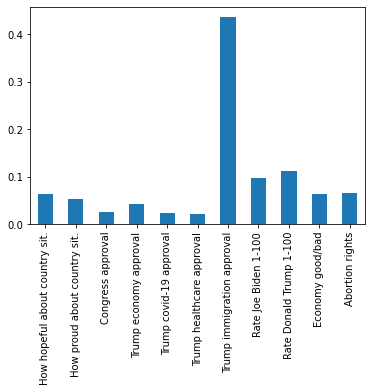

In [19]:
imp = clf.feature_importances_
forest_importances = pd.Series(imp, index=[
    "How hopeful about country sit.",
    "How proud about country sit.",
    "Congress approval",
    "Trump economy approval",
    "Trump covid-19 approval",
    "Trump healthcare approval",
    "Trump immigration approval",
    "Rate Joe Biden 1-100",
    "Rate Donald Trump 1-100",
    "Economy good/bad",
    "Abortion rights"])

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)

In [4]:
from scipy.stats import f_oneway, ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [5]:
church = df[(df["V201453"] < 4) & (df["V201453"] != -1)]["V201337"]
nonchurch = df[(df["V201453"] >= 4) | (df["V201453"] == -1)]["V201337"]

In [14]:
tukey = pairwise_tukeyhsd(endog=df["V201337"],groups=df["V201462"],alpha=0.05)

In [15]:
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    -9     -8   2.5249 0.0008   0.655  4.3947   True
    -9      2   2.7984    0.0  2.3434  3.2534   True
    -9      5   2.4932    0.0  2.0967  2.8897   True
    -9      6   2.2094    0.0  1.7116  2.7072   True
    -9      7   2.5491    0.0  2.1174  2.9808   True
    -9      8    2.385    0.0  1.9438  2.8262   True
    -9      9   2.4388    0.0  1.9853  2.8922   True
    -9     12   2.4576    0.0  2.0575  2.8577   True
    -9     13   2.3155    0.0   1.912   2.719   True
    -8      2   0.2735    1.0 -1.5714  2.1184  False
    -8      5  -0.0317    1.0 -1.8631  1.7997  False
    -8      6  -0.3154 0.9999 -2.1714  1.5405  False
    -8      7   0.0242    1.0 -1.8151  1.8635  False
    -8      8  -0.1399    1.0 -1.9814  1.7017  False
    -8      9  -0.0861    1.0 -1.9306  1.7584  False
    -8     12  -0.0673    1.0 -1.8994  1.7649 

(0.0, 1000.0)

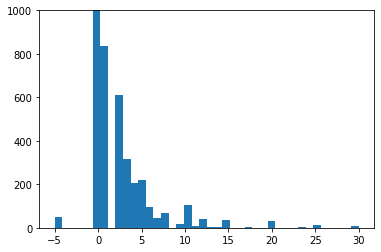

In [26]:
plt.hist(df[(df["V201628"] < 99)]["V201628"], bins=40, range=(-5,30))
plt.ylim([0,1000])